In [17]:
from ziziv1 import get_model, evaluate, config, make_grid

In [9]:
import os
os.path.isdir("./trained-models/zizi-test-128/")

True

In [32]:
pipeline = DDPMPipeline.from_pretrained("trained-models/zizi-test-128")

In [33]:
result = pipeline(batch_size=4, num_inference_steps=15)

  0%|          | 0/15 [00:00<?, ?it/s]

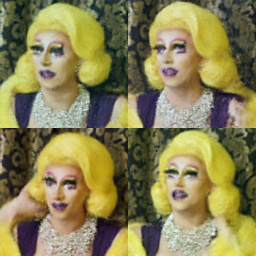

In [34]:
make_grid(result.images, 2, 2)